In [1]:
import pickle
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import svm
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import ShuffleSplit
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.pipeline import Pipeline

In [2]:
path = '/Users/louispht/Dropbox/git_projects/news_classifier/Data cleaning/Pickles/'

# X_test
with open(path + 'X_test_noact.pickle', 'rb') as data:
    X_test = pickle.load(data)
    
# y_test
with open(path + 'y_test_noact.pickle', 'rb') as data:
    y_test = pickle.load(data)

In [3]:
path = '/Users/louispht/Dropbox/git_projects/news_classifier/Model training/Models/'

with open(path + 'best_svc_pipeline.pickle', 'rb') as data:
    best_svc = pickle.load(data)

In [4]:
#predictions 
svc_pred = best_svc.predict(X_test)

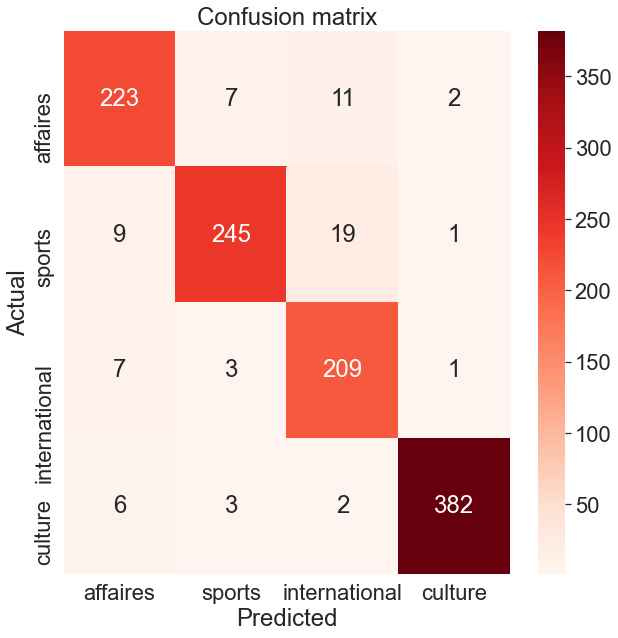

In [5]:
#Confusion matrix
#aux_df = df_all_le[['category', 'label_enc']].drop_duplicates().sort_values('category')
conf_matrix = confusion_matrix(y_test, svc_pred)
plt.figure(figsize=(10,10))
sns.set(font_scale=2)
sns.heatmap(conf_matrix, 
            annot=True,
            xticklabels=['affaires', 'sports', 'international', 'culture'],
            yticklabels=['affaires', 'sports', 'international', 'culture'],
            cmap="Reds",
            fmt = '.3g')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.savefig('conf_mat_svm.png', transparent = True)
plt.show()